During this week's meeting, we have created a heatmap based on the stock price data.

Let's recall how we have achieved this.

First, we have created a dictionary, grouping the stock price data based on its date.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# Import dataset
apple = pd.read_csv("./Dataset/aapl.csv")
apple['Date'] = pd.to_datetime(apple['Date'])

close = apple['Close'].to_list()
date = apple['Date'].dt.strftime('%m-%d').to_list()

date_dict = {}
for i in range(len(date)):
    if date[i] not in date_dict:
        date_dict.update({date[i]:[]})
    date_dict[date[i]].append(close[i])
        
date_dict

{'10-11': [10.548572,
  14.296071,
  22.432142000000002,
  17.600357000000002,
  29.075001,
  39.137501,
  53.612499,
  59.052502000000004],
 '10-12': [10.662142999999999,
  14.363929,
  22.489643,
  27.9,
  29.334999,
  39.0,
  55.5275],
 '10-13': [10.719286,
  14.586785,
  24.952499,
  27.9475,
  29.245001000000002,
  39.247501],
 '10-14': [10.796785,
  15.071428,
  17.715714000000002,
  24.6875,
  27.5525,
  29.407498999999998,
  58.967499],
 '10-15': [11.240714,
  22.67,
  17.809998999999998,
  24.385,
  27.965,
  54.34,
  58.830002],
 '10-18': [11.357142,
  15.08,
  22.594286,
  18.174643,
  29.3675,
  39.939999,
  54.005001,
  59.102501000000004],
 '10-19': [11.053214,
  14.236428,
  21.780001000000002,
  27.932501000000002,
  29.280001000000002,
  38.994999,
  54.827498999999996],
 '10-20': [11.090357000000001,
  14.118215,
  24.940001000000002,
  28.442498999999998,
  29.264999,
  39.0625],
 '10-21': [11.054286,
  14.031072,
  18.620001000000002,
  25.6175,
  28.440001000000002

Then, based on the dictionary created, we have converted the value of list to the average of the list.

In [3]:
date_dict = {k : sum(v)/len(v) for k, v in date_dict.items()}
date_dict

{'10-11': 30.719330625000005,
 '10-12': 28.468316285714288,
 '10-13': 24.449762000000003,
 '10-14': 26.314132142857144,
 '10-15': 31.034387857142857,
 '10-18': 31.202634000000003,
 '10-19': 28.300663285714283,
 '10-20': 24.4864285,
 '10-21': 26.720051285714284,
 '10-22': 31.709540714285712,
 '10-25': 31.381205625000003,
 '10-26': 28.289336714285714,
 '10-27': 24.957441166666666,
 '10-28': 27.35474471428571,
 '10-29': 33.34202366666667,
 '11-01': 31.750893,
 '11-02': 28.275969142857143,
 '11-03': 25.690297666666666,
 '11-04': 27.672653,
 '11-05': 31.87091842857143,
 '11-08': 31.583348875,
 '11-09': 28.270510142857145,
 '11-10': 25.35517833333333,
 '11-11': 27.527551142857142,
 '11-12': 31.39066285714286,
 '11-15': 30.714286,
 '11-16': 27.222653285714284,
 '11-17': 25.192678,
 '11-18': 27.915510285714287,
 '11-19': 31.58780642857143,
 '11-22': 30.056250333333335,
 '11-23': 24.143511999999998,
 '11-24': 28.59071375,
 '11-26': 31.80535733333333,
 '11-29': 30.936071249999998,
 '11-30': 27.2

We have created a nested list of size 31 * 12, to store the average data that we have derived above.

Note that we are initializing the list with `np.nan`, which stands for 'not a number', instead of 0.

In [4]:
date_list = [[np.nan for _ in range(31)] for _ in range(12)]
date_list

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  

We have also written a function to get month and day from a formatted string.

In [5]:
def dateStrip(str_date: str) -> (int, int):
    str_date = str_date.split('-', 1)
    str_date = [int(tt) for tt in str_date]
    return str_date[0], str_date[1]

Using the function written above, we can use the `date_dict` created above to fill the nested list.

In [7]:
for k, v in date_dict.items():
    month, day = dateStrip(k)
    date_list[month - 1][day - 1] = v

date_list

[[nan,
  37.387976,
  30.892321250000002,
  25.869132428571426,
  25.333452500000003,
  28.942601571428572,
  30.376020714285712,
  35.350765857142854,
  33.719821374999995,
  31.807365374999996,
  26.048163,
  25.622975999999998,
  29.624948999999997,
  31.125612,
  34.05833333333333,
  37.65988066666667,
  35.12183757142857,
  26.561012,
  25.2206436,
  21.6539288,
  32.3766434,
  36.16846985714285,
  34.287277,
  31.7447765,
  25.914642714285716,
  25.799166333333332,
  29.46535757142857,
  31.000816285714286,
  35.722244428571436,
  34.257946125000004,
  31.718749875],
 [26.38367357142857,
  25.6810715,
  29.968520571428574,
  31.844030857142858,
  35.882602428571424,
  34.89165125,
  32.5129015,
  26.40372442857143,
  26.048273833333337,
  30.95239714285714,
  32.275917285714286,
  36.59474528571429,
  35.501606374999994,
  33.331250625,
  27.798631,
  26.4019998,
  24.229357599999997,
  33.6029288,
  35.89666616666667,
  38.90333316666666,
  35.86387728571428,
  27.34020385714286

Using this nested list, we can draw the heatmap. Observe the output below.

Text(0.5, 1.0, 'Apple 2019 Stock Close Price by Date')

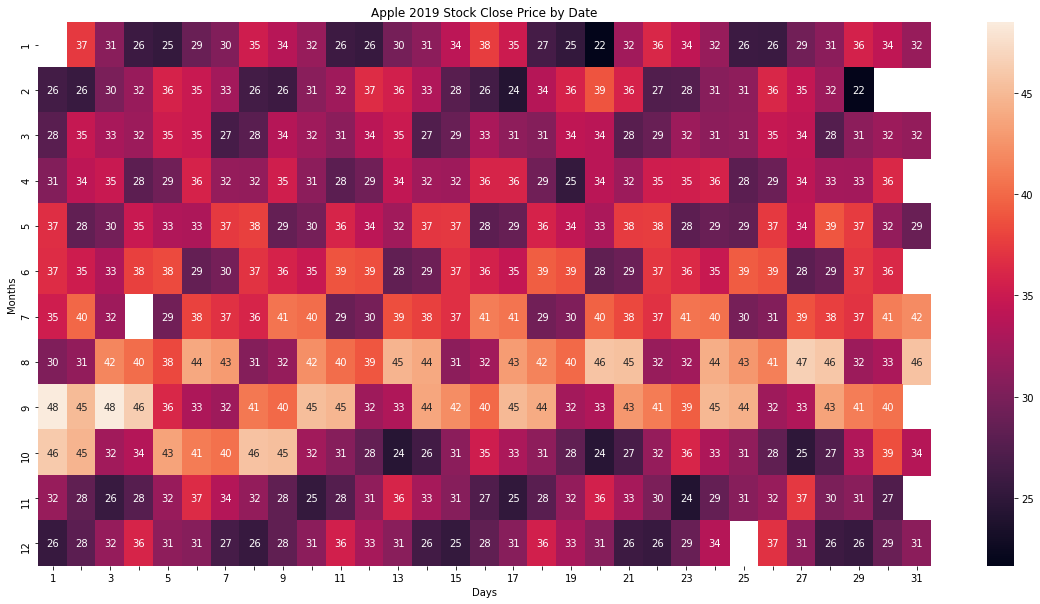

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(date_list, xticklabels = [i if i % 2 == 1 else None for i in range(1, 32)], yticklabels = [i for i in range(1, 13)], annot = True)
ax.set(xlabel = 'Days', ylabel = 'Months')
ax.set_title('Apple 2019 Stock Close Price by Date')

### Task 1

Based on the code seen above, write a function that draws a heatmap for a given year.

To obtain a year, month or day from the Pandas Timestamp object, please read [this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html).

In [25]:
# For function parameters and return value, refer to the description seen below.
# Note that since you are drawing a heatmap of one year data, no averaging of data is needed
# Thus, creation of a dictionary is not required
# Initialize the nested list with np.nan, as seen above.

# TODO: Complete the year_heatmap function

'''
params:
price_data: pd.Series
- Series containing stock price data
date_data: pd.Series
- Series containing date data for corresponsing rows of price_data
year: int
- Year in which the heatmap should be drawn

returns: None
'''
def year_heatmap(price_data: pd.Series, date_data: pd.Series, year: int):
    name = price_data.name
    price_data = price_data.to_list()
    date_data = date_data.to_list()
    date_list = [[np.nan for _ in range(31)] for _ in range(12)]
    for d in range(len(date_data)):
        if date_data[d].year == year:
            date_list[date_data[d].month - 1][date_data[d].day - 1] = price_data[d]

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 10)
    sns.heatmap(date_list, xticklabels = [i if i % 2 == 1 else None for i in range(1, 32)], yticklabels = [i for i in range(1, 13)], annot = True)
    ax.set(xlabel = 'Days', ylabel = 'Months')
    ax.set_title('Apple {} Stock {} Price by Date'.format(year, name))

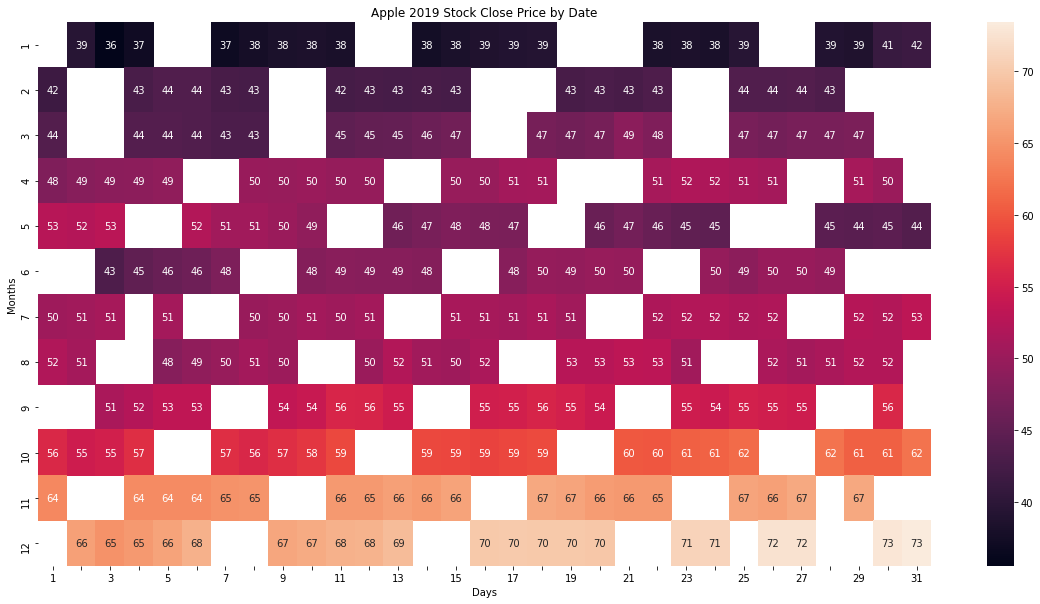

In [27]:
# Run this cell, and observe if the function behaves as expected.
# Try changing the year and price_data!

year_heatmap(apple['Close'], apple['Date'], 2019)

### Task 2

Draw a violion plots of Apple Close data, based on months

Text(0.5, 1.0, 'Apple Violion Plots of Stock Close Price by Month')

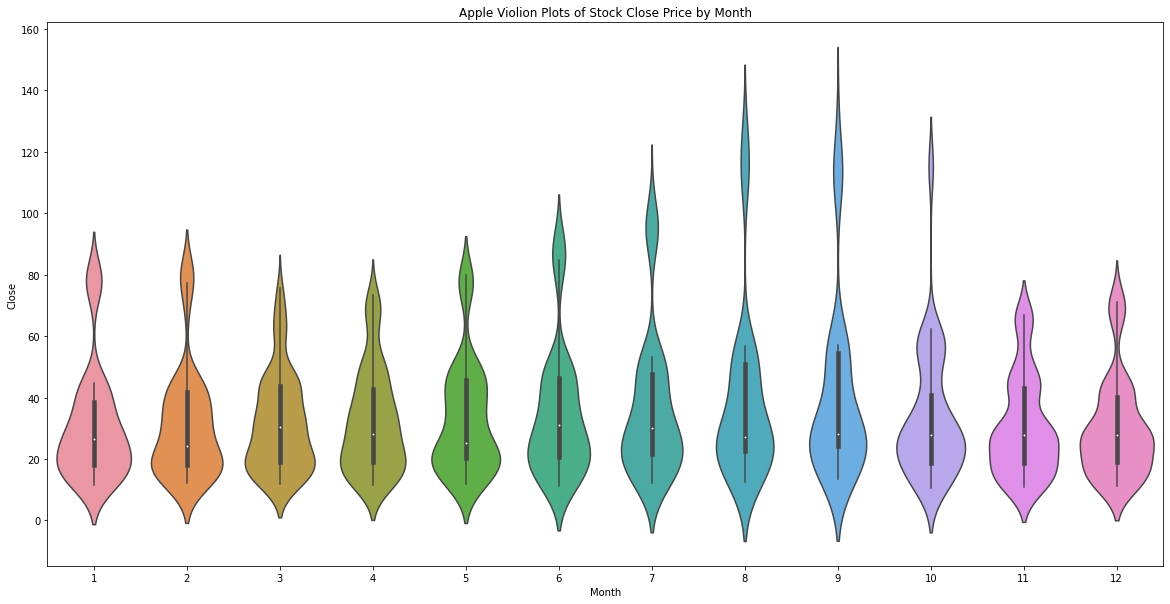

In [30]:
# TODO: Create 12 violion plots in one plot, grouped by months
# Hint: Create a new column in apple, which contains the data of month for each rows

apple['Month'] = [d.month for d in apple['Date']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.violinplot(x = apple['Month'], y = apple['Close'])
ax.set_title('Apple Violion Plots of Stock Close Price by Month')